# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [90]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
from inauguralproject import ExchangeEconomyClass

In [122]:

print(ExchangeEconomyClass().demand_B(2))

(0.6333333333333333, 0.6333333333333334)


# Question 1

1. I define a method named **question1** inside my **ExchangeEconomyClass**. This method identifies pairs of allocations $(x_1^A , x_2^A)$ that are Pareto improvements over the initial allocations $(w_1^A , w_2^A)$.

2. Through a loop, I explore possible allocations for agent A, and implicitly for agent B, appending those that are Pareto efficient to two lists: **self.list_x1A** and **self.list_x2A**.

3. In my Jupyter notebook, I instantiate **ExchangeEconomyClass** and execute **question1** to find the feasible allocations.

4. I utilize **matplotlib** in the notebook to create a scatter plot, showcasing the initial endowments and the Pareto improvements.

5. The axes are meticulously labeled to match each agent’s goods, and adjustments are made to accurately reflect the economic exchange scenario.

6. Finally, I set the plot limits to delineate the Edgeworth box and add a legend, clearly illustrating the potential for beneficial exchanges within the economy.


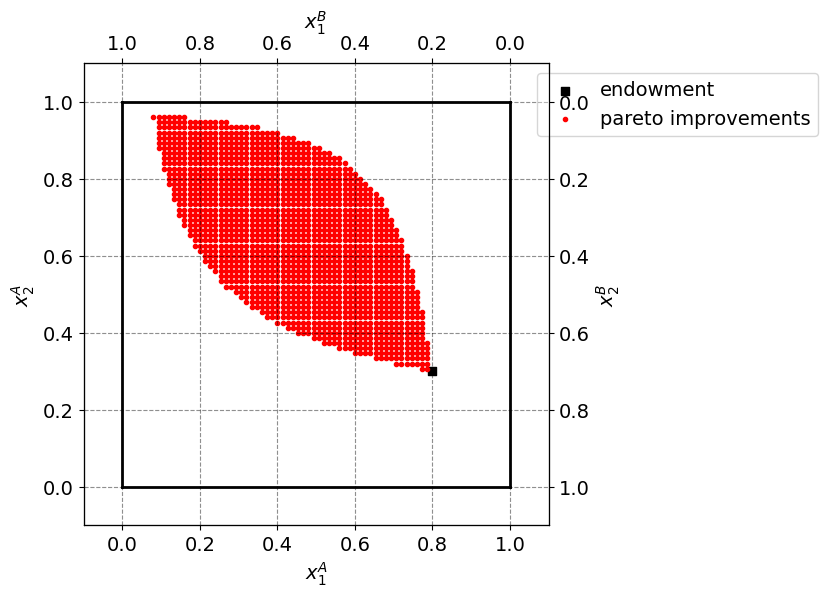

In [202]:
model=ExchangeEconomyClass()
model.question1()

list_x1A=model.list_x1A
list_x2A=model.list_x2A

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(list_x1A,list_x2A,marker='.',color='red',label='pareto improvements')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

**Explain how you solve the model**

# Question 2

Explain your code and procedure

1. I initialize an instance of $\textbf{ExchangeEconomyClass}$. This class encapsulates the entire economic model, including preferences, endowments, and market-clearing mechanisms.

2. I call the $\textbf{check\_market\_clearing}$ method with a price of 2 to print the excess demand (or supply) errors at this price, which helps in understanding the initial state of market equilibrium.

3. I create three lists: $\textbf{price1}$, $\textbf{error1}$, and $\textbf{error2}$. These will store the different prices I evaluate and the corresponding errors in the market-clearing condition for both goods.

4. I iterate over a range of prices from 0.5 to 2.5, incrementally increasing by a factor determined by the loop's range. For each price, I compute the market-clearing errors $ \epsilon_1 $ and $ \epsilon_2 $ and append them along with the price to their respective lists.

5. I establish a plotting environment using $\textbf{matplotlib}$ with a specified figure size and DPI, and no frame, to visually represent the data.

6. On the subplot, I plot $\textbf{error1}$ and $\textbf{error2}$ against $\textbf{price1}$ with distinct colors and markers, labeling each data series to indicate which error term it represents.

7. I meticulously label the axes to reflect the economic terms: $ p_1 $ for the price on the horizontal axis and the errors on the vertical axis, enhancing the interpretability of the plot.


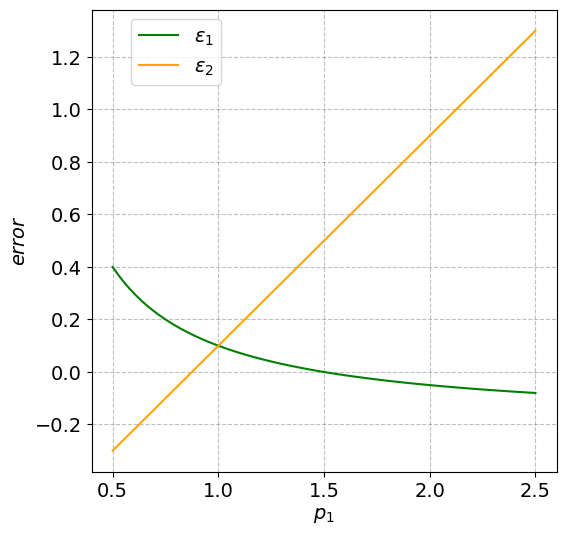

In [204]:
model = ExchangeEconomyClass()
model.question2()

price_list = model.price_list
error1 = model.error1
error2 = model.error2

fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
plot = fig.add_subplot(1,1,1)
plot.set_xlabel("$p_1$")
plot.set_ylabel("$error$")

plot.plot(price_list, error1, marker='', color='green', label='$\epsilon_1$')  # Corrected label
plot.plot(price_list, error2, marker='', color='orange', label='$\epsilon_2$')
plot.legend(frameon=True,loc='upper right',bbox_to_anchor=(0.3,1))

# Question 3

Explain your code and procedure

To find the market clearing price, we have to find the price of $p_1$ in which both the error terms are zero.




## Question 4

QUESTION 4A

EXPLAIN CODE

The biggest value for uA is: 0.4749306138030085 and it is achieved at price p_1 = 0.9533333333333334


Text(0, 0.5, '$u^A$')

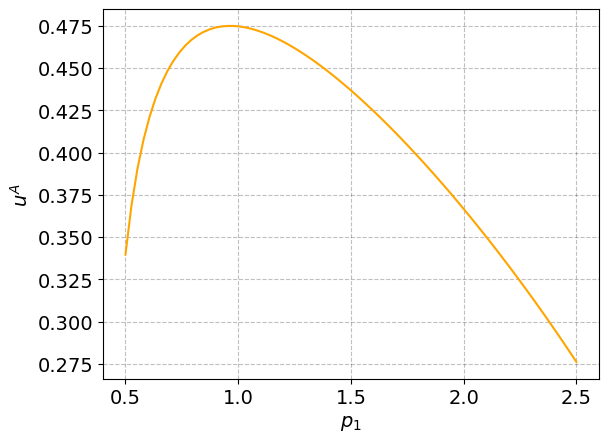

In [248]:
model = ExchangeEconomyClass()
list_uA = []

for p in price_list:
    x1B, x2B = model.demand_B(p)
    x1A = 1-x1B
    x2A = 1-x2B

    uA = model.utility_A(x1A, x2A)
    list_uA.append(uA)


import numpy as np

# Assuming list_uA and price_list are defined and have the same length
list_uA = np.array(list_uA)
price_list = np.array(price_list)

# Find the index of the maximum value in list_uA
index_of_max_uA = np.argmax(list_uA)

# Use this index to find the corresponding price
price_with_max_uA = price_list[index_of_max_uA]

# And the maximum value for list_uA itself
max_uA_value = list_uA[index_of_max_uA]

print(f"The biggest value for uA is: {max_uA_value} and it is achieved at price p_1 = {price_with_max_uA}")

#I create a quick scatter to demonstrate the value of uA as well as p1
plt.plot(price_list, list_uA, marker='', color='orange')
plt.xlabel("$p_1$")
plt.ylabel("$u^A$")

#See that the biggest value for uA is: 0.4749306138030085 and it is achieved at price p_1 = 0.9533333333333334


Question 4B

The biggest value for uA is: (0.4749306138030085+0j) and it is achieved at price p_1 = 0.9533333333333334


Text(0, 0.5, '$u^A$')

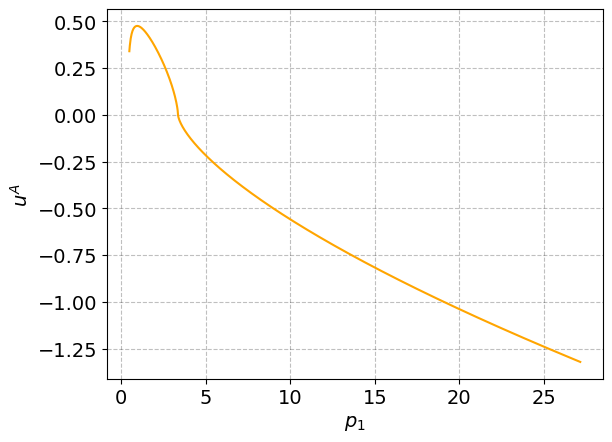

In [260]:
price_list_new = []

for p in range(1000):
    price = 0.5 + 2 * (p / 75)
    price_list_new.append(price)


model = ExchangeEconomyClass()
list_uA = []

for p in price_list_new:
    x1B, x2B = model.demand_B(p)
    x1A = 1-x1B
    x2A = 1-x2B

    uA = model.utility_A(x1A, x2A)
    list_uA.append(uA)


import numpy as np

# Assuming list_uA and price_list are defined and have the same length
list_uA = np.array(list_uA)
price_list_new = np.array(price_list_new)

# Find the index of the maximum value in list_uA
index_of_max_uA = np.argmax(list_uA)

# Use this index to find the corresponding price
price_with_max_uA = price_list_new[index_of_max_uA]

# And the maximum value for list_uA itself
max_uA_value = list_uA[index_of_max_uA]

print(f"The biggest value for uA is: {max_uA_value} and it is achieved at price p_1 = {price_with_max_uA}")

#I create a quick scatter to demonstrate the value of uA as well as p1
plt.plot(price_list_new, list_uA, marker='', color='orange')
plt.xlabel("$p_1$")
plt.ylabel("$u^A$")

#See that the biggest value for uA is: 0.4749306138030085 and it is achieved at price p_1 = 0.9533333333333334



Det er nok ikke et argument, men men kan se, at nytten bliver mindre og mindre og mindre. Hvordan man ved at den fortsat bare vil falde jo større prisen på vare 1 bliver, ja, det ved jeg sgu ikke. Men måske er det her argument nok.

OPDATERING: JEG TROR MÅSKE VI KAN BRUGE MINIMZER, OG SÅ MAKSIMERE DEN NEGATIVE. HEHE

## Question 5